# Project Overview

# Problem Statement

Dream Housing Finance is a company that offers home loans to customers in three different areas:
 - urban
 - semi-urban
 - rural
 
 Required Steps for applying for home loans are as below:
 - customers should fill in the online application form
 - The company verifies customers eligibility for the loan.
 - eligible customers then apply for a home loan
 
 The company's aim is to automate the loan eligibility process in real-time using the information provided by customers in their online application form.
 
To achieve this goal, they have posed a problem of identifying eligible customer segments based on a partial dataset, so that they can target these customers more effectively.

# The business context

**who is my client company?**

 As a data scientist, my client company is Dream Housing Finance company.

**Which kind of data do they have?**

The company has a dataset containing customer information such as:
- Gender 
- Marital Status
- Education
- Number of Dependents
- Income
- Loan Amount
- Credit History
- and others. 

This data will be used to determine the eligibility of customers for home loans.

**Why do they need me as a data scientist?**

Dream Housing Finance company needs me as a data scientist to automate the loan eligibility process based on the customer's detailed information. 
- By using the available customer data, I will develop a model that can predict the customers who are eligible for a loan amount. As a result the company will be able to specifically target these customers.

 The advantages of automating this process are as below:
 - It will save time and resources for the company
 - make the loan eligibility process more efficient and accurate.
 
As a data scientist, my role is to develop a predictive model that can analyze the customer data and provide guidance to the company in their decisions making about the home loan approvals.

# Importing the Libraries

In [3]:
# for reading csv files
import pandas as pd  

# for visualizing
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# puting the results in a nice formated table
from tabulate import tabulate

# for preprocessing the data such as normalizing, encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

# for spliting the data set into training and test stes, Hyperparameters tuning and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# algorithms that are used to train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# for Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# using precision, recall and f1_score for evaluation
from sklearn.metrics import classification_report 


# Loading the Dataset

In [4]:
# Importing "Loan Prediction" dataset form kaggel 
loan_df = pd.read_csv("training.csv")

# Data exploration discussion

**How do distributions of the attributes look like?**

- The dataset contains 614 rows and 13 columns (including the target variable)
- The target variable is the Loan_Status column, which indicates whether a customer's loan was approved or not. This is a binary variable with 'Y' indicating approval and 'N' indicating rejection.
- The dataset contains both categorical and numerical features. 
    - The categorical features:  Gender, Married, Dependents, Education, Self_Employed, Property_Area, and Credit_History. 
    - The numerical features: ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term.
- The dataset contains missing values, with some columns having significant numbers of missing values:
for example
    - Credit_History:50 
    - Self_Employed:32
    - etc.
- The LoanAmount column has a few extreme values that are much higher than the other values, which are considerd as outliers.
- The Credit_History column is highly imbalanced, with over 84% of customers having a credit history of 1.

**What are the most interesting metadata?**

- I would say that the target variable, the Loan_Status column, is the most interesting metadata and our goal is to predict whether a customer's loan will be approved or not based on their characteristics.

- The Credit_History column is also interesting as it is highly imbalanced and can dramaticaly impact the loan approval decision.

- The Self_Employed and LoanAmount columns are also interesting as they have a huge number of missing values, and understanding how to deal with them is an absolute for developing an accurate prediction.

**Interpretation**

In [5]:
#show first 10 rows, the default is 5.
loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
# getting the number of rows of the dataset
num_of_rows = loan_df.shape[0]

# getting the number of columns of the dataset
num_of_cols = loan_df.shape[1]

#printing the number of rows and columns in a sentance.
print(f"The loan prediction dataset has {num_of_rows} rows and {num_of_cols} columns.")

The loan prediction dataset has 614 rows and 13 columns.


**Generate  a descriptive statistics**

In [7]:
# this code returns the main statistical concepts related to the dataset
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Columns Name and Thier Values**

- '.columns' to get **the name of the columns** 

- '.columns.values.tolist()' to get **the name of the columns** as a **list**

- '.value_counts()' to access **the values of each feature**

In [8]:
# this code returns the name of the features as a list
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# making a list of columns name
feature_names = loan_df.columns.values.tolist()

# calling names using a for_loop
for feature in feature_names:
    # using an if condition to skip the 'Loan_Id' columns and other numerical variables.
    if loan_df[feature].dtype != object or feature == "Loan_ID":
        continue
    else:
        # Get the value counts for the feature and reset the index
        value_counts = loan_df[feature].value_counts().reset_index()
        
        # Rename the columns
        value_counts.rename(columns={"index": feature, feature: "Count"}, inplace=True)
        
        # Print the table using the tabulate package
        print(f"{feature} value counts:")
        # making a nice format using 'fancy_grid'
        print(tabulate(value_counts, headers="keys", tablefmt="fancy_grid"))
        print("\n")

Gender value counts:
╒════╤══════════╤═════════╕
│    │ Gender   │   Count │
╞════╪══════════╪═════════╡
│  0 │ Male     │     489 │
├────┼──────────┼─────────┤
│  1 │ Female   │     112 │
╘════╧══════════╧═════════╛


Married value counts:
╒════╤═══════════╤═════════╕
│    │ Married   │   Count │
╞════╪═══════════╪═════════╡
│  0 │ Yes       │     398 │
├────┼───────────┼─────────┤
│  1 │ No        │     213 │
╘════╧═══════════╧═════════╛


Dependents value counts:
╒════╤══════════════╤═════════╕
│    │ Dependents   │   Count │
╞════╪══════════════╪═════════╡
│  0 │ 0            │     345 │
├────┼──────────────┼─────────┤
│  1 │ 1            │     102 │
├────┼──────────────┼─────────┤
│  2 │ 2            │     101 │
├────┼──────────────┼─────────┤
│  3 │ 3+           │      51 │
╘════╧══════════════╧═════════╛


Education value counts:
╒════╤══════════════╤═════════╕
│    │ Education    │   Count │
╞════╪══════════════╪═════════╡
│  0 │ Graduate     │     480 │
├────┼──────────────┼──

# Data Preprocessing Steps

**What are the common data quality issues of the data?**

The main data quality issues ara as follow:
- Missing values: Some of the data values meight be missing because of incomplete customer information or data collection errors.
- Outliers: These are some data that are outside of the expected range of values and definitly have negative impact on model's predictions.
- Inconsistent formatting: diffrent format for the same variable such as various spelling for the same category.
- Invalid values: values that are not related to that category.
- Duplicate data: repeated values that can bias the model's predictions.

**Applying curation techniques to adress the data quality issues:**

- Tackling the missing, invalid, or duplicate values
  - determain the **types** of the variable
  - **drop** the corresponding row or columns 
  - for **numerical values**, impute/replace the missing data with **mean**
  - for **numerical values**, impute/replace the missing data wiht **mode**

- Tackling outliers: We can remove the outliers to neutarl the impact of outliers on the model's predictions.

- Tackling inconsistent formatting: We can standardize the formatting of variables via methods such as string matching.

**Cleaning the dataset**

we can use Python libraries such as:
- **Pandas** to load and manipulate the data 
- **NumPy** to perform operations such as imputation and normalization.

We can also visualize the data to identify any outliers or inconsistencies using:
- Matplotlib 
- Seaborn 

At last, we can apply the data **curation techniques** described above to clean the data and prepare it for model training.

**Finding the Nan values using 'isnull()' and the total by the "sum" methods**

In [10]:
# this code first finds the null valuses for each variable and then add them up using sum method.
# finally, sort the result from the biggest value to the lowest.
loan_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

**Total Number of Null values in the DataFrame**

In [11]:
# this code finds the total number of null values in the entire dataset.
print(f"The total number of missing/null values is {loan_df.isnull().sum().sum()}.")

The total number of missing/null values is 149.


**Apply "drop()" method to remove the Loan_ID from dataset**

In [12]:
# this code drops the index id, which is not an important factor for loan prediction.
loan_df = loan_df.drop("Loan_ID", axis=1)

# shows the first 5 rows by default
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Checking the 'types' of the variables**

In [13]:
# returns the type of features
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Addressing the missing values:**
- for **numerical values**, replace the missing ones with **mean**
- for **numerical values**, replace the missing ones wiht **mode**

In [14]:
# listing the numerical variables that have null values.
num_feature_cols = ["LoanAmount", "Loan_Amount_Term", "Credit_History" ]

# listing the categorical variables that have null values.
cat_feature_cols = ["Gender", "Married", "Self_Employed", "Dependents"  ]

# replacing the missing values with mean in numerical features
for num_feature in num_feature_cols:
    loan_df[num_feature].fillna(loan_df[num_feature].mean(), inplace=True)
  
  # replacing the missing values with mode in categorical features.
for cat_feature in cat_feature_cols:
    loan_df[cat_feature].fillna(loan_df[cat_feature].mode()[0], inplace=True)

In [15]:
# rechecking for missing/nan values
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

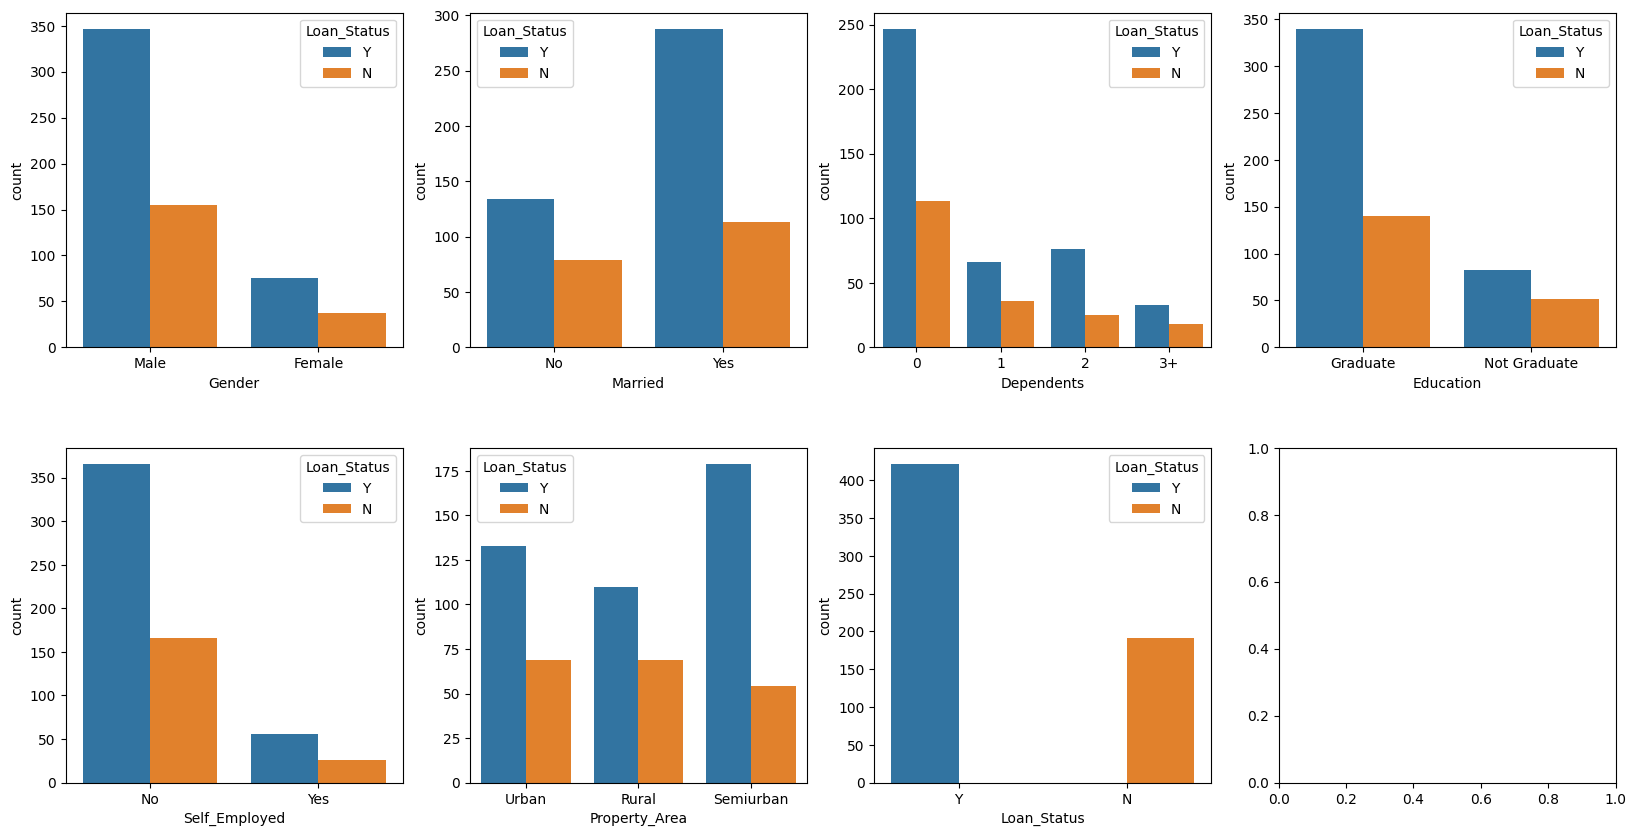

In [16]:
# puting all categorical variables in a list called cat_feature_cols
cat_feature_cols = ["Gender", "Married", "Dependents", "Education" , "Self_Employed", "Property_Area", "Loan_Status"]

# Create a figure and a set of subplots.
# subplots divide the page into 2 rows and 4 columns.
# using the variable axs for multiple Axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), clear= True)

#using a for_loop for calling categorical variables and ploting them
for idx, feature in enumerate(cat_feature_cols):
    
    # this line of code determin the spot of the plot in 8 parts.
    row, col = idx//4, idx%4
    # this line of code plot the features based on the loan_status.
    sns.countplot(x=feature,  data=loan_df, hue="Loan_Status", ax=axes[row, col])

# this line of code put horizontal space between to rows of plots
plt.subplots_adjust(hspace=0.3)

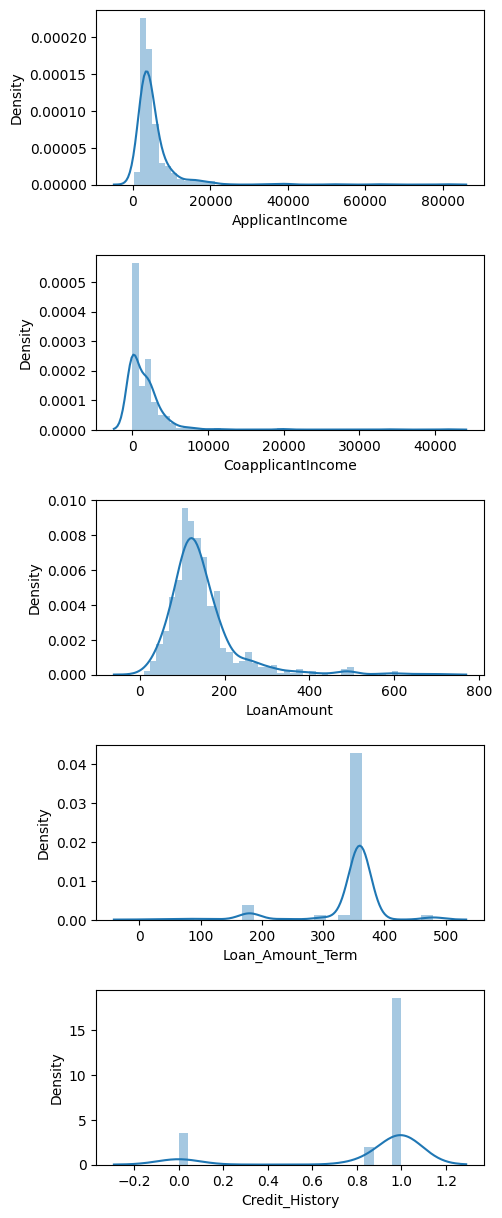

In [17]:
# puting numerica variables in a list called num_feature_cols
num_feature_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History" ]

# making subplots with 5 rows and 1 column for our 5 numerical features
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5, 15))
for idx, feature in enumerate(num_feature_cols):
    sns.distplot(loan_df[feature], ax=axes[idx])

#putting horizontal space between rows.    
plt.subplots_adjust(hspace=0.4)

# Encoding the Categorical Variables

In [18]:
# Looking at the various values of each categorical variables
cat_feature_cols = ["Gender", "Married", "Dependents", "Education" , "Self_Employed", "Property_Area", "Loan_Status"]

# calling the categorical variables one-by-one using a for_loop and printing the various values that they have using 'uinque' method.
for cat_feature in cat_feature_cols:
    print(f"{cat_feature}: {loan_df[cat_feature].unique()}")

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


**Encoding Mixed Types data using LabelEncoder**

In [19]:
# listing categorical variables
cat_feature_cols = ["Gender", "Married", "Dependents", "Education" , "Self_Employed", "Property_Area", "Loan_Status"]

# using lableEncoder to conver categorical data into numerical values.
lbl_encoder = LabelEncoder()

# this for_loop convert categorical values into numerical data one by one.
for cat_feature in cat_feature_cols:
    loan_df[cat_feature] = lbl_encoder.fit_transform(loan_df[cat_feature])

# Preparing x and y using pandas

In [20]:
# puting all the data but the target column in new data set called x
x = loan_df.iloc[:, :-1].values 

# checking the shalpe of x for the number of rows and columns.
print(f"x_shape: {x.shape}")

#checking the type of data in x
print(f"x_type: {type(x)}")

# select target
y = loan_df.iloc[:, -1].values

#checking the type of target column.
print(f"\ny_type: {type(y)}")

#checking the shape of target column.
print(f"y_shape: {y.shape}")

x_shape: (614, 11)
x_type: <class 'numpy.ndarray'>

y_type: <class 'numpy.ndarray'>
y_shape: (614,)


**Splitting x and y into training and test sets**

In [21]:
# dividing x and y into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# finding the the shape of the x_train subset
print(f"x_train_shape; {x_train.shape}")

# finding the the shape of the y_train subset
print(f"y_train_shape: {y_train.shape}")

# finding the the shape of the x_test subset
print(f"x_test_shape: {x_test.shape}")

# finding the the shape of the y_test subset
print(f"y_test_shape: {y_test.shape}")

x_train_shape; (491, 11)
y_train_shape: (491,)
x_test_shape: (123, 11)
y_test_shape: (123,)


**Feature Scaling**

Data standardization is transforming data to a smaller scale in a way that keeps the variations in the value range while rescaling them to have a mean of 0 and a variance of 1.

In [22]:
# normalizing the data in a way that mean will be zero and variance will be 1. However, the variation of the data remains untoched.
scaler = StandardScaler()

# first train the model and then transfer the training data.
x_train = scaler.fit_transform(x_train)

# using the trained model to transform the test data set.
x_test = scaler.transform(x_test)

# Cross Validation

In [23]:
# puting all the data but the target column in new data set called x
x = loan_df.iloc[:, :-1].values 

# checking the shalpe of x for the number of rows and columns.
print(f"x_shape: {x.shape}")

#checking the type of data in x
print(f"x_type: {type(x)}")

# select target
y = loan_df.iloc[:, -1].values

#checking the type of target column.
print(f"\ny_type: {type(y)}")

#checking the shape of target column.
print(f"y_shape: {y.shape}")


x_shape: (614, 11)
x_type: <class 'numpy.ndarray'>

y_type: <class 'numpy.ndarray'>
y_shape: (614,)


In [24]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier() ]

def compare_models_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, x, y, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy =  round(mean_accuracy, 2)
        
        print(f"\nCross Validation accuracies for {model} = {cv_score}\n")
        print(f"Accuracy percentage  % of the {model} = {mean_accuracy}")
        print("----------------------------")

In [25]:
compare_models_cross_validation()


Cross Validation accuracies for LogisticRegression(max_iter=1000) = [0.81300813 0.77235772 0.7804878  0.85365854 0.81147541]

Accuracy percentage  % of the LogisticRegression(max_iter=1000) = 80.62
----------------------------


# Creating the Model

# Decision Tree Classifier

**Model Training**

In [ ]:
# using decision tree classifier as ML algorithm
dtree_classifier= DecisionTreeClassifier()
# training the model
dtree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

**Making predictions**
- Applying the traind model on x_test for prediction

In [ ]:
# the trained decision tree classifier is used to predict the x_test values.
y_pred = dtree_classifier.predict(x_test)

**Evaluation**

- accuracy_score
- classification_report
- confusion_matrix

In [ ]:
# applying three diffenent evalualtion metrics to assess our model.
eval_metrics={'accuracy_score':accuracy_score, 'classification_report':classification_report, 'confusion_matrix':confusion_matrix}

# using a for_loop to access the keys and values of the above dictionary.
for  name, eval_metric in eval_metrics.items():
    #print the accuricy results nicely.
    print(f"\nModel Evaluation Using {name}:\n{eval_metric(y_test, y_pred)}")


Model Evaluation Using accuracy_score:
0.6910569105691057

Model Evaluation Using classification_report:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51        45
           1       0.72      0.83      0.77        78

    accuracy                           0.69       123
   macro avg       0.66      0.64      0.64       123
weighted avg       0.68      0.69      0.68       123


Model Evaluation Using confusion_matrix:
[[20 25]
 [13 65]]


# K-Nearest Neighbors Algorithm

The value of k is one of the main factors in K_nearest neighbor algorithm. so in order to get an accurate model, 
first we try to train the model for diffrent values of k and then pick a value for k which gives the maximum accuracy.

Accuracy using KNN classifier:
   Best k_value = 12
   max_accuracy = 0.7642


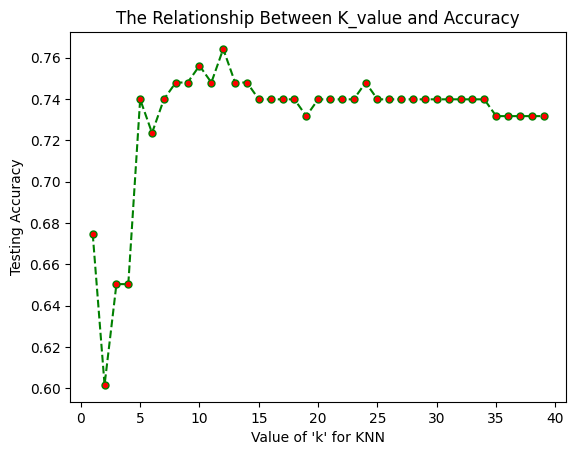

In [ ]:
# defining a range for value of k
k_range = range(1,40)
accuracy = []

# applying a for loop for training, predicting and evaluating the model using KNN classifier for diffrent values of k ranging from 1 to 40.
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # training the model
    knn_model.fit(x_train, y_train)
    
    #applying the tarinde model on test dataset
    y_pred = knn_model.predict(x_test)
    
    #checking the accuracy of the model
    accuracy.append(accuracy_score(y_test, y_pred))

# finding the maximum accuracy
max_accuracy = max(accuracy)

#finding the corresponding k_value for the most accurate model
best_k = accuracy.index(max_accuracy) + 1 

#printing the optimal value for k and the highest accuracy score.
print(f"Accuracy using KNN classifier:\n   Best k_value = {best_k}\n   max_accuracy = {round(max_accuracy,4)}")

# plot the relationship between k_value and testing accuracy
# customizing the color, linestyle, marker's color and size
plt.plot(k_range, accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)

# adding title to the graph
plt.title("The Relationship Between K_value and Accuracy")
# adding label to x axis
plt.xlabel("Value of 'k' for KNN")
#adding label to y axis
plt.ylabel("Testing Accuracy")
plt.show()
    

# Logistic Regression

In [ ]:
## Applying logistic regression as a ML algorithm to train the model in order to lable the new values to one of the categories.
# making an instance of logistic regression algorithm.
lg_reg_model = LogisticRegression()

# training the model using the Logreg algorithm
lg_reg_model.fit(x_train, y_train)

# usign the trained model to predict the label of x_test values.
y_pred = lg_reg_model.predict(x_test)

# applying three diffenent evalualtion metrics to assess our model.
eval_metrics={'accuracy_score':accuracy_score, 'classification_report':classification_report, 'confusion_matrix':confusion_matrix}

# using a for_loop to access the keys and values of the above dictionary.
for  name, eval_metric in eval_metrics.items():
    #print the accuricy results nicely.
    print(f"\nModel Evaluation Using {name}:\n{eval_metric(y_test, y_pred)}")


Model Evaluation Using accuracy_score:
0.7479674796747967

Model Evaluation Using classification_report:
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        45
           1       0.72      1.00      0.83        78

    accuracy                           0.75       123
   macro avg       0.86      0.66      0.65       123
weighted avg       0.82      0.75      0.70       123


Model Evaluation Using confusion_matrix:
[[14 31]
 [ 0 78]]


**Hyperparameter Tuning**

In [ ]:
# since Logistic Regressin's accuracy is higher than decision tree and Knn models, 
# I will tune the hyperparameters of it in hope of improving the model and getting better prediction.

# creating a dictionary of hyperparameters to tune the LogisticRegression hyperparameters
## penalty: Specifies the norm used in the penalization. The default is 'l2', which corresponds to Ridge regularization.
## C: Inverse of regularization strength. Smaller values specify stronger regularization. The default is 1.0.
## solver: Algorithm to use in the optimization problem:
## The default is 'lbfgs', which is a good choice for small datasets. Other options include 'saga', 'liblinear', and 'newton-cg'.
hyperparameters = {'solver': ['saga', 'liblinear', 'lbfgs', 'newton-cg' ], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# then we creat an instance of logistic regression algorithm
lg_reg_model = LogisticRegression()

#creating an instance of grid search cross validation with 5 folds.
grid_search = GridSearchCV(lg_reg_model, hyperparameters, scoring='accuracy', cv=5)

# apply grid search on fit method to train the model.
grid_search.fit(x_train, y_train)

# printing the optimal hyperparameters 
print(f"Best hyperparameters: {grid_search.best_params_}")

# printing the corresponding accuracy score to the best Hyperparameter
print(f"Best accuracy score: {grid_search.best_score_}")


Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy score: 0.8269016697588126


In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00083919, 0.00117445, 0.        , 0.00118246, 0.00210586,
        0.00314264, 0.00083776, 0.00442567, 0.00370665, 0.        ,
        0.00044727, 0.        , 0.00064497, 0.0002563 , 0.00426607,
        0.00470552, 0.00313716, 0.        , 0.        , 0.        ,
        0.        , 0.00374913, 0.00163069, 0.00332928, 0.00649276,
        0.        , 0.00312223, 0.        , 0.00362687, 0.        ,
        0.0053237 , 0.0058393 , 0.00301223, 0.00242443, 0.0009975 ,
        0.        , 0.0041245 , 0.00080194, 0.00317764, 0.00666723,
        0.00454297, 0.00175323, 0.00020714, 0.        , 0.00286007,
        0.00176744, 0.00188127, 0.00481486]),
 'std_fit_time': array([7.95026268e-04, 2.34889984e-03, 0.00000000e+00, 1.94748343e-03,
        1.79827379e-03, 6.28528595e-03, 1.67551041e-03, 7.24381638e-03,
        7.41329193e-03, 0.00000000e+00, 5.50303219e-04, 0.00000000e+00,
        1.28993988e-03, 5.12599945e-04, 2.63371749e-03, 6.06779410e-03,
        6.27431870e-0

In [ ]:
## Loading the results to pandas dataframe
grid_search_result_df = pd.DataFrame(grid_search.cv_results_)
grid_search_result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000839,0.000795,0.001612,0.002162,0.001,l1,saga,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",0.69697,0.704082,0.704082,0.704082,0.693878,0.700618,0.004353,31
1,0.001174,0.002349,0.000000,0.000000,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.30303,0.295918,0.295918,0.295918,0.306122,0.299382,0.004353,36
2,0.000000,0.000000,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
3,0.001182,0.001947,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
4,0.002106,0.001798,0.000399,0.000488,0.001,l2,saga,"{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}",0.69697,0.704082,0.704082,0.704082,0.693878,0.700618,0.004353,31


In [ ]:
grid_search_result_summary = grid_search_result_df[['param_C','param_penalty', 'param_solver', 'mean_test_score']]
grid_search_result_summary

,param_C,param_penalty,param_solver,mean_test_score
0,0.001,l1,saga,0.700618
1,0.001,l1,liblinear,0.299382
2,0.001,l1,lbfgs,NaN
3,0.001,l1,newton-cg,NaN
4,0.001,l2,saga,0.700618
5,0.001,l2,liblinear,0.824861
6,0.001,l2,lbfgs,0.700618
7,0.001,l2,newton-cg,0.700618
8,0.01,l1,saga,0.700618
9,0.01,l1,liblinear,0.716698


**Evaluating the Logistic Regression model with/without hyperparameter tuinig**

In [ ]:

# Creating an instance of Logistic Regression with the best parameters obtained from GridSearchCV
lg_reg_best = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'])

# Evaluating the performance of the Logistic Regression model with default parameters using cross-validation
c_v_scores = cross_val_score(lg_reg_model, x_train, y_train, cv=5)
print("Average accuracy score with default parameters:", round(c_v_scores.mean(), 3))

# Evaluating the performance of the Logistic Regression model with best parameters obtained from GridSearchCV using cross-validation
c_v_scores_best = cross_val_score(lg_reg_best, x_train, y_train, cv=5)
print("Average accuracy score with best parameters:", round(c_v_scores_best.mean(), 3))


Average accuracy score with default parameters: 0.825
Average accuracy score with best parameters: 0.827


# discussion and conclusion

First, I analyzed the Loan Prediction Problem Dataset to obtain knowledge about the loan status based on various categorical and numerical features.
The overall strengths of  the antalysis are as follow:
 - Identifying the cricial factors that affect loan approvals, such as credit history, income, and education.
 - Visualizing the relationships between loan status and features.
 - Iidentifying the missing values and outliers, and addressing these data quality issues by replacing mean for numerical variables and mode for categorical variables.
 - Encoding the categorical variables using LabelEncoder.


Second, I used two different classifiers to train the model and predicit the unseen values.
 - I applied different ML algorithms such as DecisionTree ,K-NearestNeighbors  and LogisticRegression algorithms on the same dataset and the accuracy scores were 0.71 ,  0.79 and 0.79 respectively.
 - In addition, I implimentd the hyperparameter tuning to improve the accuracy of Logistic Regression model. the accuracy before and after tuning is about 0.82, which is not a good predicting model.
 - oveall, it seems to me that LogisticRegression is slightly more accurate compared to Decision tree and KNN classifier.
 however, a better result can be obtained by managing the missing values and applying other advanced ML algorithm.

# Reference

Loan Prediction Problem Dataset (2019). Available at: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset.